#**Bank Marketing Analysis**

# bank client data:
- age: age (numeric)
-   job: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
-   marital: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
-   education: education (categorical: "unknown","secondary","primary","tertiary")
-   default: has credit in default? (binary: "yes","no")
-   balance: average yearly balance, in euros (numeric)
-   housing: has housing loan? (binary: "yes","no")
-   loan: has personal loan? (binary: "yes","no")

# related with the last contact of the current campaign:
-   contact: contact communication type (categorical: "unknown","telephone","cellular")
-   day: last contact day of the month (numeric)
-   month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
-   duration: last contact duration, in seconds (numeric)

# other attributes:
-   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
-   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
-   previous: number of contacts performed before this campaign and for this client (numeric)
-   poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
-   emp.var.rate: employment variation rate - quarterly indicator (numeric)
-   cons.price.idx: consumer price index - monthly indicator (numeric)
-   cons.conf.idx: consumer confidence index - monthly indicator (numeric)
-   euribor3m: euribor 3 month rate - daily indicator (numeric)
-   nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
-   y: has the client subscribed a term deposit? (binary: "yes","no")

In [59]:
#@title Import Full Bank File

import pandas as pd

# Read Banking CSV file
url = 'https://raw.githubusercontent.com/johnnydrodriguez/data622/refs/heads/main/bank_full.csv'
bank_df = pd.read_csv(url, delimiter=';')

# Display the first 5 rows
display(bank_df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Calculate Correlation Matrix for Numerical Values


In [60]:
bank_numerical_df = bank_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = bank_numerical_df.corr()
display(correlation_matrix)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


## Visualize the Correlation Matrix

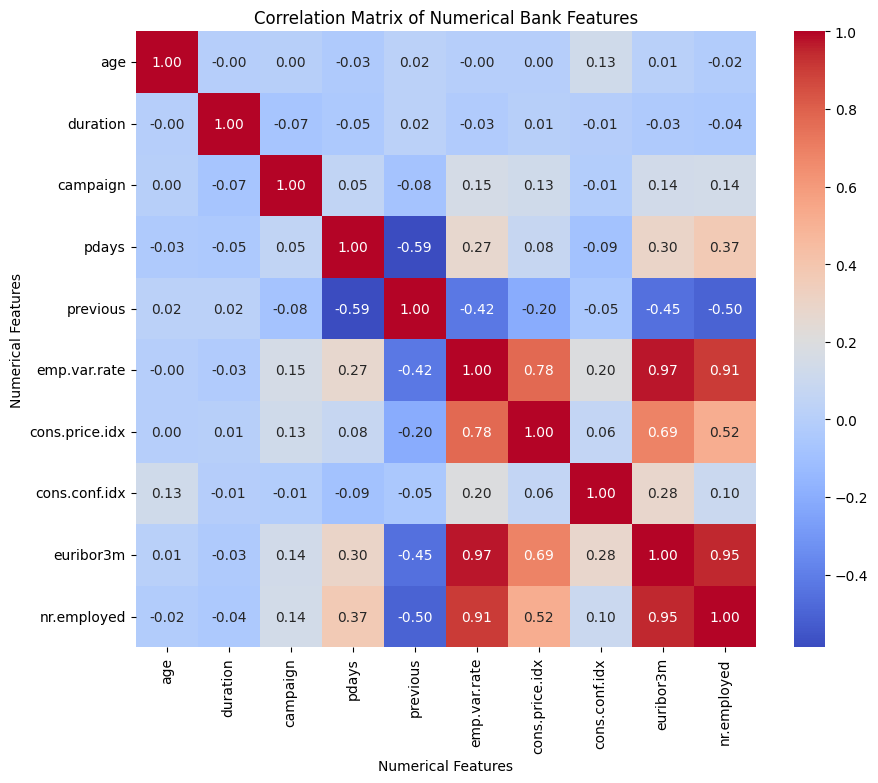

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Bank Features')
plt.xlabel('Numerical Features')
plt.ylabel('Numerical Features')
plt.show()

## Summary of Correlation of Numerical Bank Values

The high positive correlations among emp.var.rate, euribor3m, and nr.employed indicate multicollinearity, which can make it difficult for models to determine the independent effect of each variable and may lead to unstable results. The strong negative correlation between pdays and previous reflects their inverse relationship; one or both might need transformation or feature engineering to best capture their information. Addressing these correlations by removing them or using techniques that are not sensitive to multicollinearity is crucial for building interpretable predictive models.


- emp.var.rate and euribor3m have a very high positive correlation (0.97).
- emp.var.rate and nr.employed have a high positive correlation (0.91).
- euribor3m and nr.employed have a high positive correlation (0.95).
- pdays and previous have a strong negative correlation (-0.59).









##Contingency Tables for the Categorical Values and Target Variable


In [62]:
categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()
contingency_tables = {}
for col in categorical_columns:
    if col != 'y':
        # Calculate raw contingency table
        raw_table = pd.crosstab(bank_df[col], bank_df['y'])
        # Calculate percentages based on row totals and format to 2 decimal places
        percentage_table = (raw_table.div(raw_table.sum(axis=1), axis=0) * 100).round(2)
        contingency_tables[col] = percentage_table

# Display the contingency tables with percentages
for col, table in contingency_tables.items():
    print("\n\n")
    print(f"Contingency table with percentages for {col} and y:")
    display(table)




Contingency table with percentages for job and y:


y,no,yes
job,,
admin.,87.03,12.97
blue-collar,93.11,6.89
entrepreneur,91.48,8.52
housemaid,90.00,10.00
management,88.78,11.22
retired,74.77,25.23
self-employed,89.51,10.49
services,91.86,8.14
student,68.57,31.43





Contingency table with percentages for marital and y:


y,no,yes
marital,,
divorced,89.68,10.32
married,89.84,10.16
single,86.00,14.00
unknown,85.00,15.00





Contingency table with percentages for education and y:


y,no,yes
education,,
basic.4y,89.75,10.25
basic.6y,91.80,8.20
basic.9y,92.18,7.82
high.school,89.16,10.84
illiterate,77.78,22.22
professional.course,88.65,11.35
university.degree,86.28,13.72
unknown,85.50,14.50





Contingency table with percentages for default and y:


y,no,yes
default,,
no,87.12,12.88
unknown,94.85,5.15
yes,100.00,0.00





Contingency table with percentages for housing and y:


y,no,yes
housing,,
no,89.12,10.88
unknown,89.19,10.81
yes,88.38,11.62





Contingency table with percentages for loan and y:


y,no,yes
loan,,
no,88.66,11.34
unknown,89.19,10.81
yes,89.07,10.93





Contingency table with percentages for contact and y:


y,no,yes
contact,,
cellular,85.26,14.74
telephone,94.77,5.23





Contingency table with percentages for month and y:


y,no,yes
month,,
apr,79.52,20.48
aug,89.40,10.60
dec,51.10,48.90
jul,90.95,9.05
jun,89.49,10.51
mar,49.45,50.55
may,93.57,6.43
nov,89.86,10.14
oct,56.13,43.87





Contingency table with percentages for day_of_week and y:


y,no,yes
day_of_week,,
fri,89.19,10.81
mon,90.05,9.95
thu,87.88,12.12
tue,88.22,11.78
wed,88.33,11.67





Contingency table with percentages for poutcome and y:


y,no,yes
poutcome,,
failure,85.77,14.23
nonexistent,91.17,8.83
success,34.89,65.11


## Summary of Correlation of Categorical Values

These categorical values appear to have a greater correlation to the target variable y (deposit subscription).  Variables not listed show similar rates across all of its categories.

- Job: Students and retired individuals show higher term deposit subscription rates.
-  Marital Status: Single individuals have slightly higher subscription rates.
- Education: Illiterate and university degree holders show relatively higher subscription rates.
- Contact Month: March, October, September, and December have significantly higher subscription rates.
- Previous Outcome: A successful outcome in the previous campaign is a strong indicator of subscription in the current campaign.



## Histograms for Numerical Variables


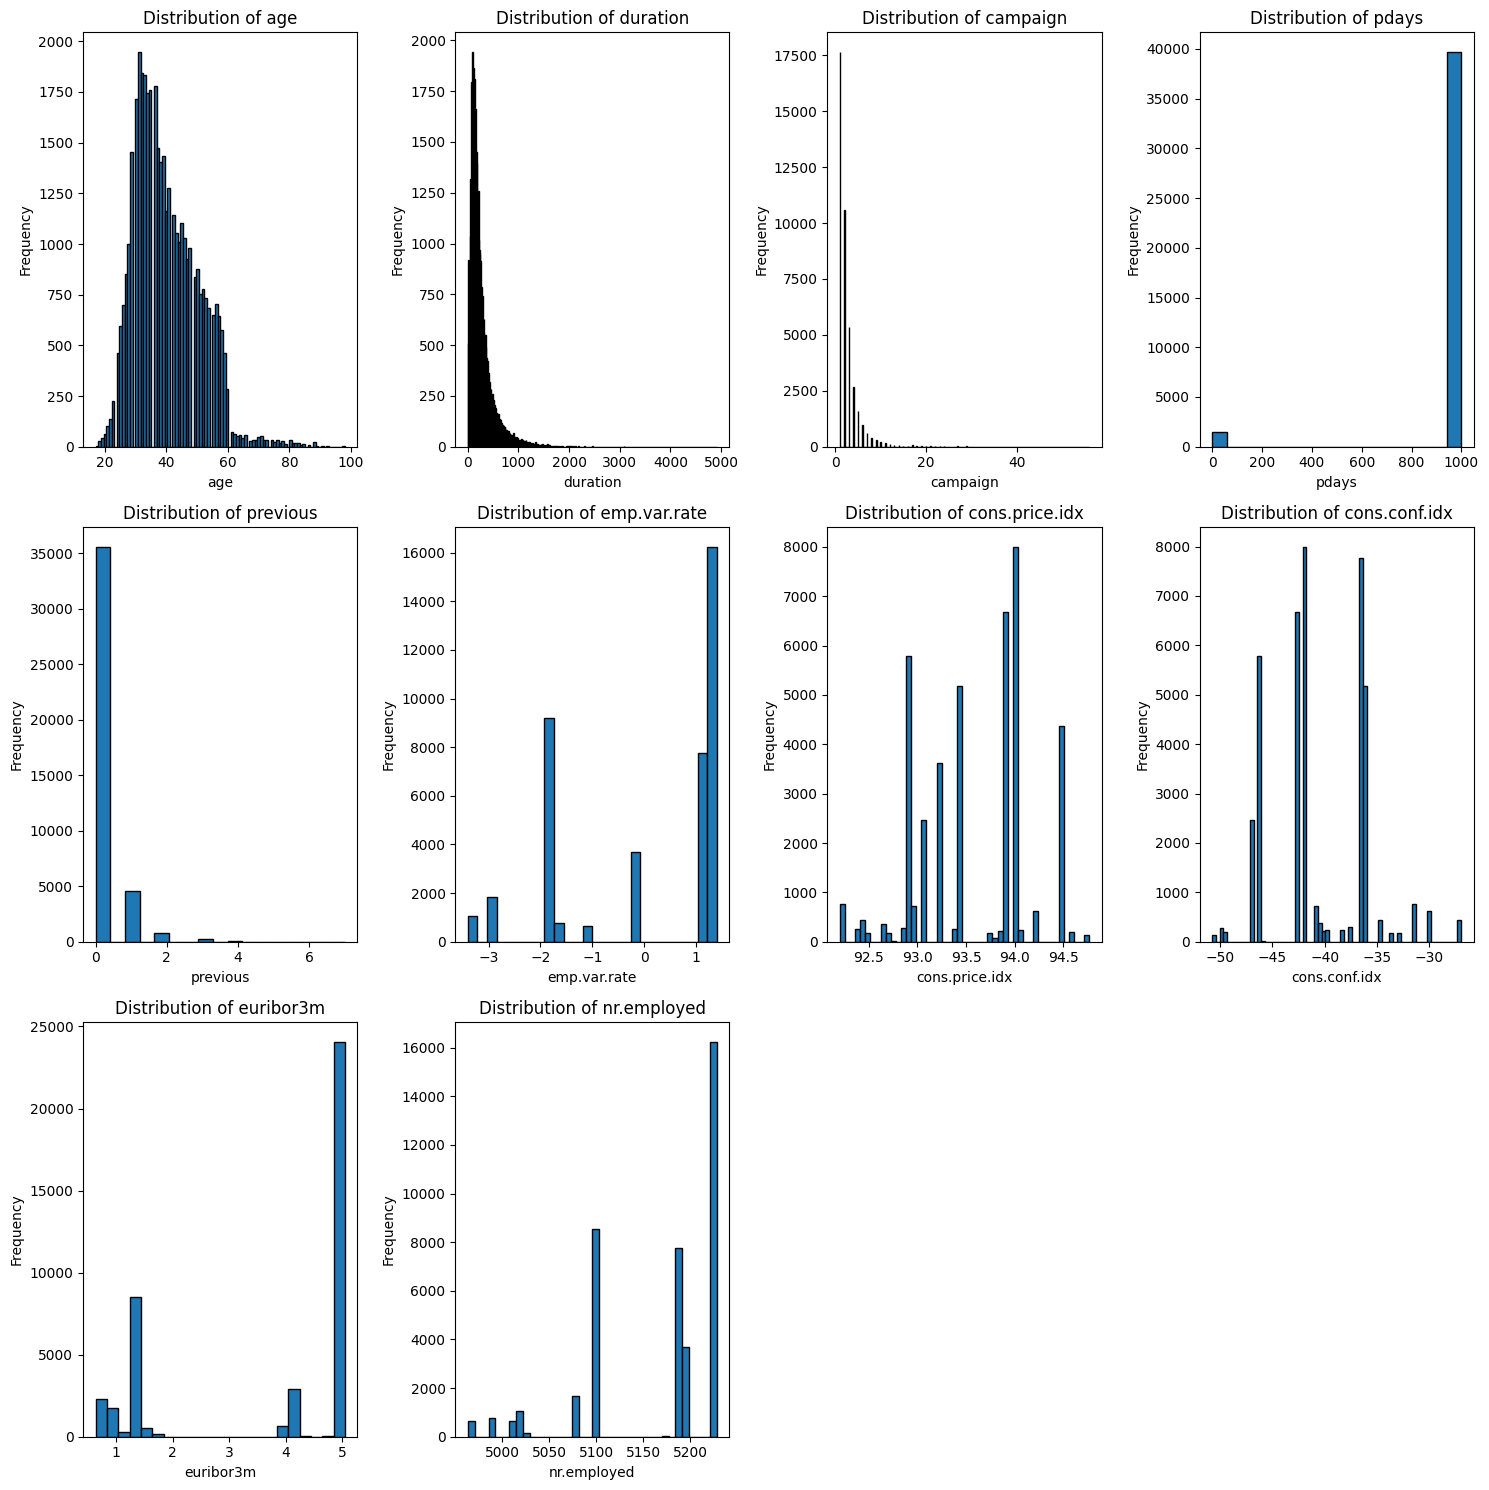

In [63]:
import matplotlib.pyplot as plt
import math

numerical_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Determine the number of rows and columns for the grid
n_cols = 4
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Histograms for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(bank_df[col], bins='auto', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary of Histogram Distributions for Numerical Values

- Age: Slightly right-skewed, generally suitable for modeling, minor transformation might help modeling.

- Duration & Campaign: Highly right-skewed. Log or square root transformations are likely needed for models sensitive to distribution. Extreme values might impact some models.

- Pdays: Bimodal distribution with a large spike at 999 (indicating no previous contact). This value acts as a placeholder for "unknown" or "not applicable" in the context of previous contact days, indicating sparsity for those who were not contacted before. This requires special handling for modeling as the 999 values are not a true numerical measure of days.

- Previous: Distribution concentrated at 0, with a long tail. Most clients had no previous contacts. This sparsity at higher values might mean that models will primarily learn from the distinction between 0 and non-zero values.

- Environmental/Economic Indicators (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed): Distributions vary greatly. High correlations among these variables (multicollinearity) need to be addressed.


## Distribution Count plots for Categorical Values



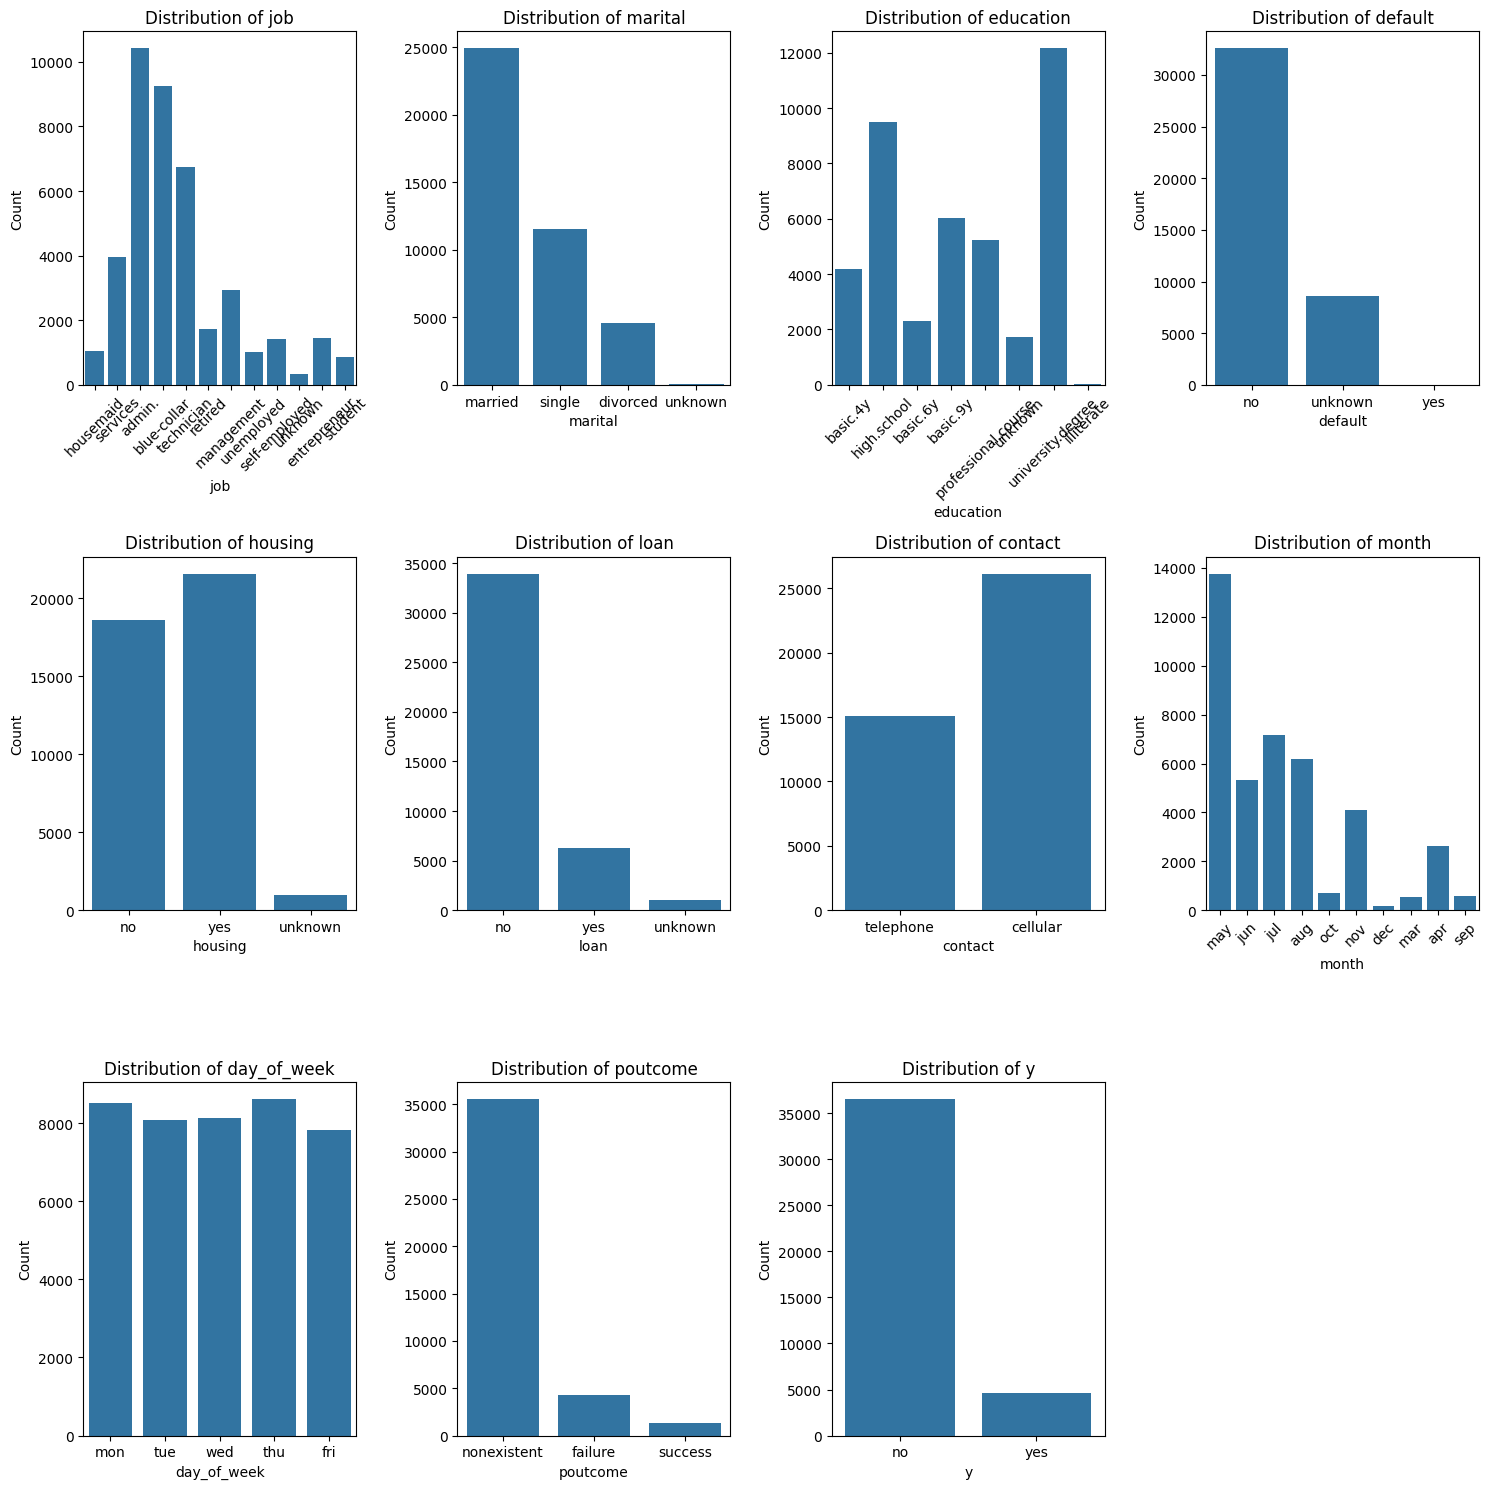

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()

# Determine the number of rows and columns for the grid
n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(data=bank_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    if bank_df[col].nunique() > 5:
        axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary of Distribution Counts for Categorical Values

- Job Distribution: Job distribution varies, with 'admin.' and 'blue-collar' being the most frequent. Categories like 'unknown', 'unemployed', and 'housemaid' have significantly fewer instances, which could lead to less reliable predictions for these specific groups.

- Marital Status Distribution: 'married' is the most frequent marital status, followed by 'single' and 'divorced'. The 'unknown' category for marital status is very small and might be handled as missing data.

- Education Distribution: 'university.degree' and 'high.school' are the most frequent education levels. 'illiterate' has a very low count, representing data sparsity for this category. The 'unknown' education level frequency is a high and would need consideration for how it's handled.

- Contact Distribution: 'cellular' is the the most frequent contact type, with 'telephone' being less frequent. The absence of an 'unknown' category here simplifies handling compared to other variables.

- Poutcome Distribution: 'nonexistent' is by far the most frequent outcome of the previous marketing campaign, indicating that for most clients, there wasn't a previous campaign or the outcome is not recorded. 'failure' is the next most frequent, while 'success' is relatively rare. This significant imbalance and the high frequency of 'nonexistent' represent sparsity in the 'failure' and 'success' categories and will heavily influence how this feature is used.

## Box plots for Numerical Values (To Identiy Outliers)


Box plots for each numerical column to visualize their distributions and identify outliers, arranging them in a grid.



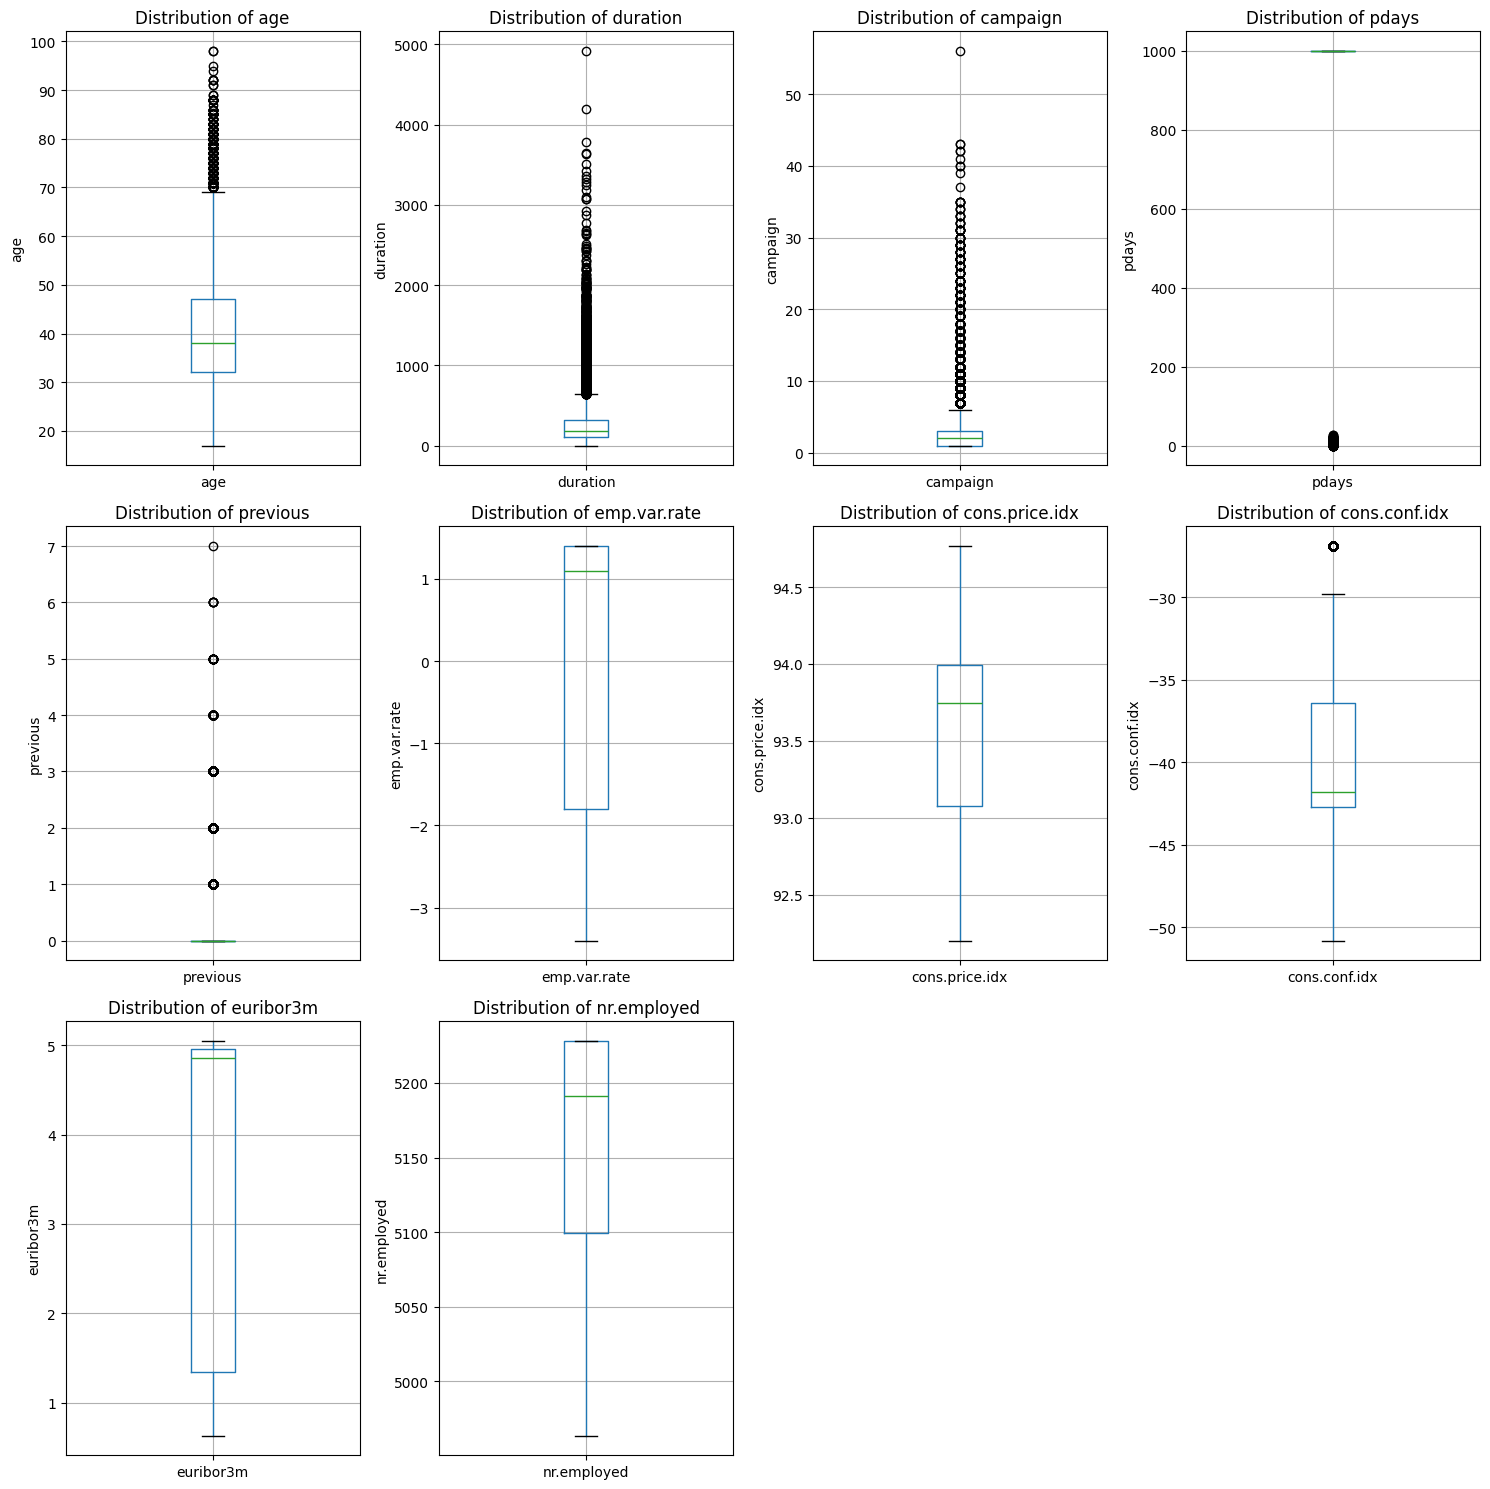

In [65]:
import matplotlib.pyplot as plt
import math

numerical_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determine the number of rows and columns for the grid
n_cols = 4
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Box plots for each numerical column
for i, col in enumerate(numerical_columns):
    bank_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary of Outliers for Numerical Values

- Age: The box plot for 'age' shows potential outliers among older individuals, which are likely genuine data points. However, they data points may have outsized influence.

- Duration & Campaign: Both 'duration' and 'campaign' show a large number of outliers extending far above the upper whisker.  These extreme values will likely require transformations like log or square root for many models.

- Pdays: The 'pdays' variable shows a large cluster at 999 and a spread of values below that. The values below 999 are not outliersbut represent the actual number of days for those previously contacted. This variable needs specific handling due to the  meaning of the 999 value - perhaps as a categorical value rather than a numeric one.

- Previous: The 'previous' variable shows a number of outliers with values greater than 0, representing clients with multiple previous contacts. These are likely valid data points; transformation for the high frequency of zero values may be necessary.

- Environmental and Economic Indicators: These variables generally show fewer extreme outliers.

## Count tables for Categorical values (To Identiy Outliers)

In [66]:
categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()

print("Percentage Distribution for Categorical Variables:")
for col in categorical_columns:
    print("\n\n") # Add extra newlines for spacing
    print(f"Percentage distribution for '{col}':")
    # Calculate value counts as percentages
    percentage_counts = bank_df[col].value_counts(normalize=True) * 100
    # Round the percentage counts to 2 decimal places
    display(percentage_counts.round(2))

Percentage Distribution for Categorical Variables:



Percentage distribution for 'job':


,proportion
job,
admin.,25.30
blue-collar,22.47
technician,16.37
services,9.64
management,7.10
retired,4.18
entrepreneur,3.54
self-employed,3.45
housemaid,2.57





Percentage distribution for 'marital':


,proportion
marital,
married,60.52
single,28.09
divorced,11.20
unknown,0.19





Percentage distribution for 'education':


,proportion
education,
university.degree,29.54
high.school,23.10
basic.9y,14.68
professional.course,12.73
basic.4y,10.14
basic.6y,5.56
unknown,4.20
illiterate,0.04





Percentage distribution for 'default':


,proportion
default,
no,79.12
unknown,20.87
yes,0.01





Percentage distribution for 'housing':


,proportion
housing,
yes,52.38
no,45.21
unknown,2.40





Percentage distribution for 'loan':


,proportion
loan,
no,82.43
yes,15.17
unknown,2.40





Percentage distribution for 'contact':


,proportion
contact,
cellular,63.47
telephone,36.53





Percentage distribution for 'month':


,proportion
month,
may,33.43
jul,17.42
aug,15.00
jun,12.91
nov,9.96
apr,6.39
oct,1.74
sep,1.38
mar,1.33





Percentage distribution for 'day_of_week':


,proportion
day_of_week,
thu,20.94
mon,20.67
wed,19.75
tue,19.64
fri,19.00





Percentage distribution for 'poutcome':


,proportion
poutcome,
nonexistent,86.34
failure,10.32
success,3.33





Percentage distribution for 'y':


,proportion
y,
no,88.73
yes,11.27


## Summary of Outliers for Categorical Values

- Job Distribution: Categories like 'unknown' (0.80%), 'unemployed' (2.46%), and 'housemaid' (2.57%) have significantly fewer instances, representing potential sparsity that could affect modeling for these specific groups.

- Marital Status Distribution: The 'unknown' category for marital status is very small (0.19%) and might be handled as missing data.

- Education Distribution: 'illiterate' has a very low count (0.04%), representing significant data sparsity for this category. The 'unknown' education level also has a notable percentage (4.20%) and would need consideration for how it's handled.

- Default Distribution: The 'yes' category for 'default' has an extremely low percentage (0.01%). This indicates a high class imbalance for this feature, where almost all clients do not have credit in default. This sparsity means models might struggle to learn from the 'yes' category. The 'unknown' category is also substantial (20.87%).

- Poutcome Distribution: 'success' is relatively rare (3.33%), representing sparsity in this important category. This imbalance and sparsity in 'success' will heavily influence how this feature is used.

## Density plots to find pattern in Numerical data



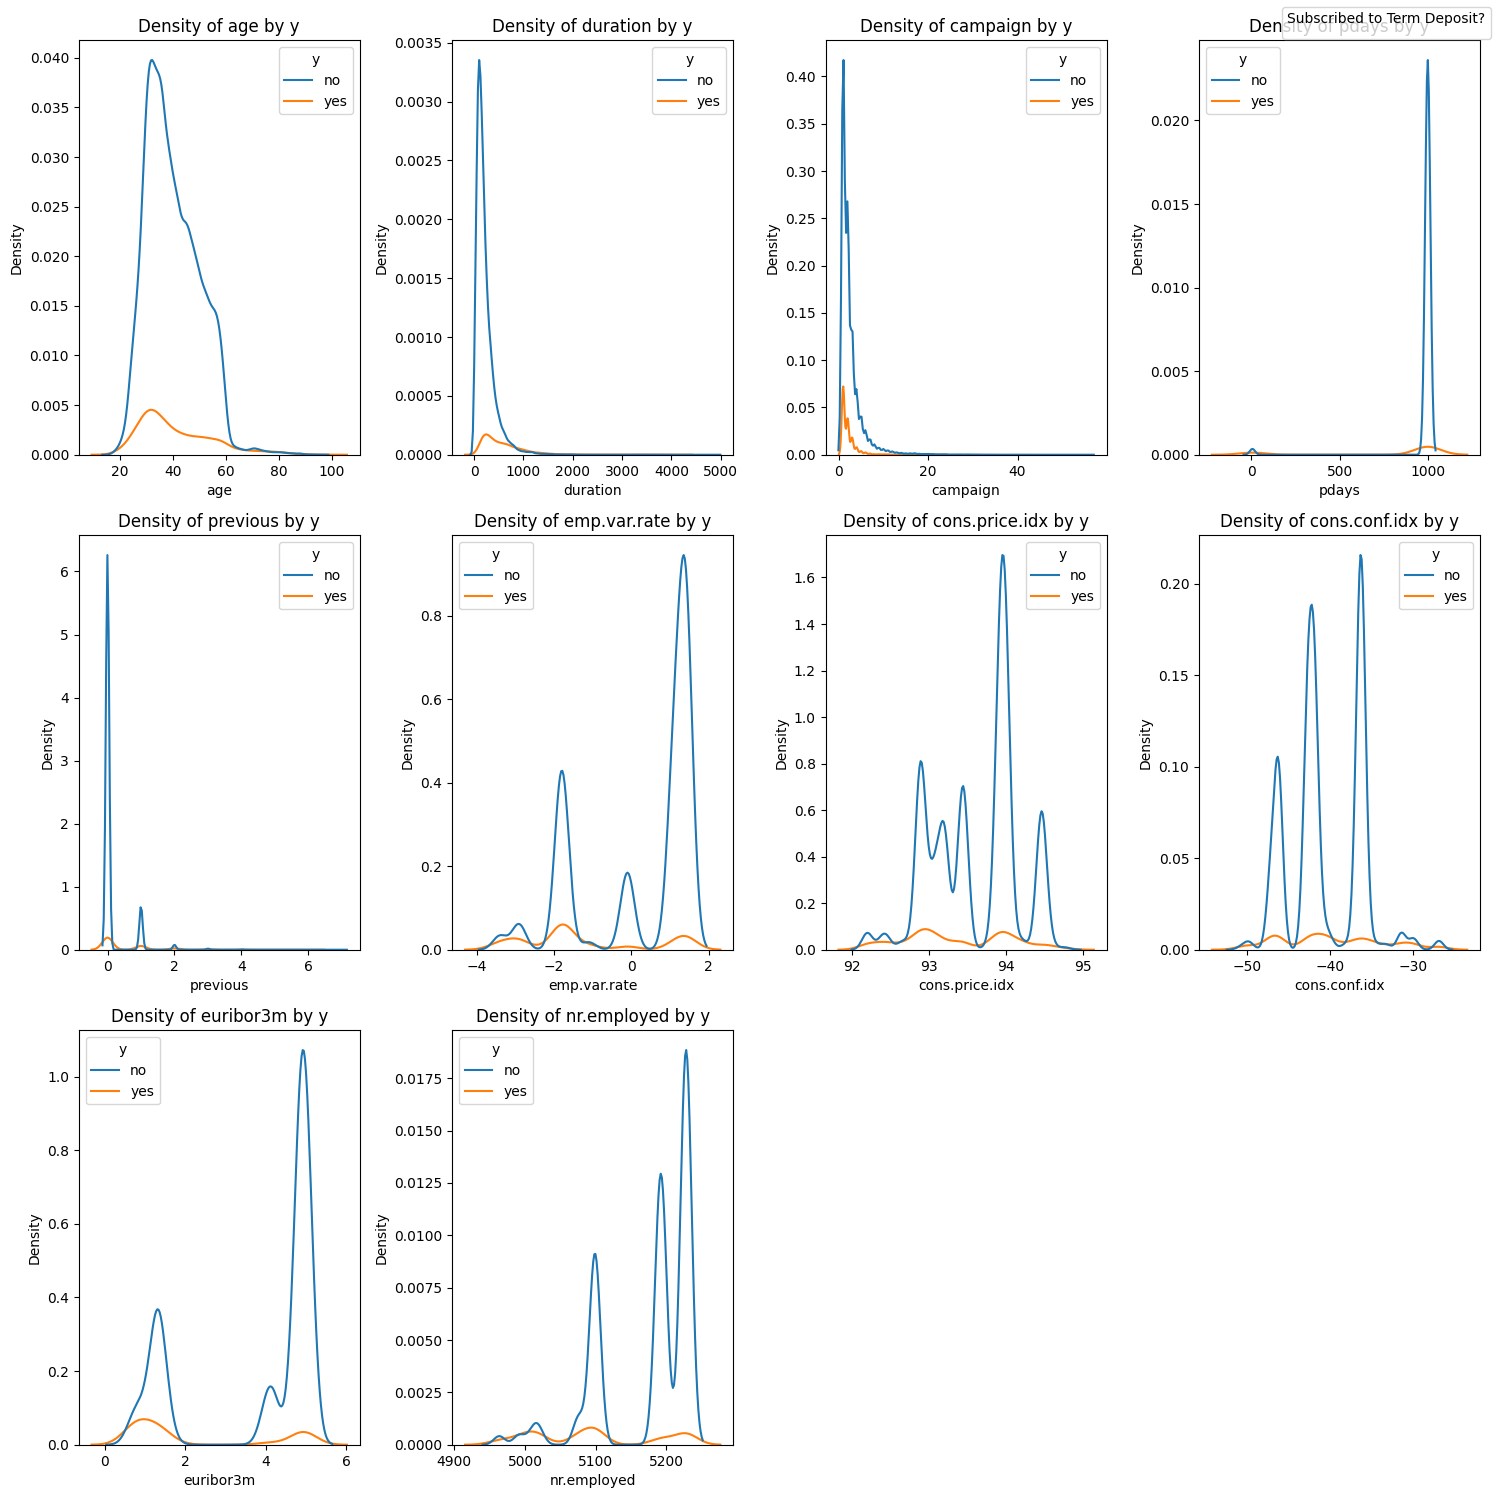

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

numerical_columns = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determine the number of rows and columns for the grid
n_cols = 4
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Density plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Use kdeplot for density plots
    sns.kdeplot(data=bank_df, x=col, hue='y', ax=axes[i], hue_order=['no', 'yes'])
    axes[i].set_title(f'Density of {col} by y')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Add a single legend to the figure after generating all plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Subscribed to Term Deposit?')


plt.show()

## Summary of Emergent Pattern for Numerical Data

- The Density plots show the class imbalance, with 'no' densities consistently higher than 'yes'.

- This imbalance can lead to predictive models being biased towards the majority 'no' class.

- Standard accuracy metrics can be misleading; we would need to use precision, recall, F1-score, or AUC to provide a accurate assessment of a model's ability to correctly identify the minority class.

-  Models may have difficulty learning the patterns of the minority 'yes' class due to limited examples.

- Addressing class imbalance through resampling, different algorithms, or class weights is crucial

## Stack Bar plots to identify patterns in categorical data

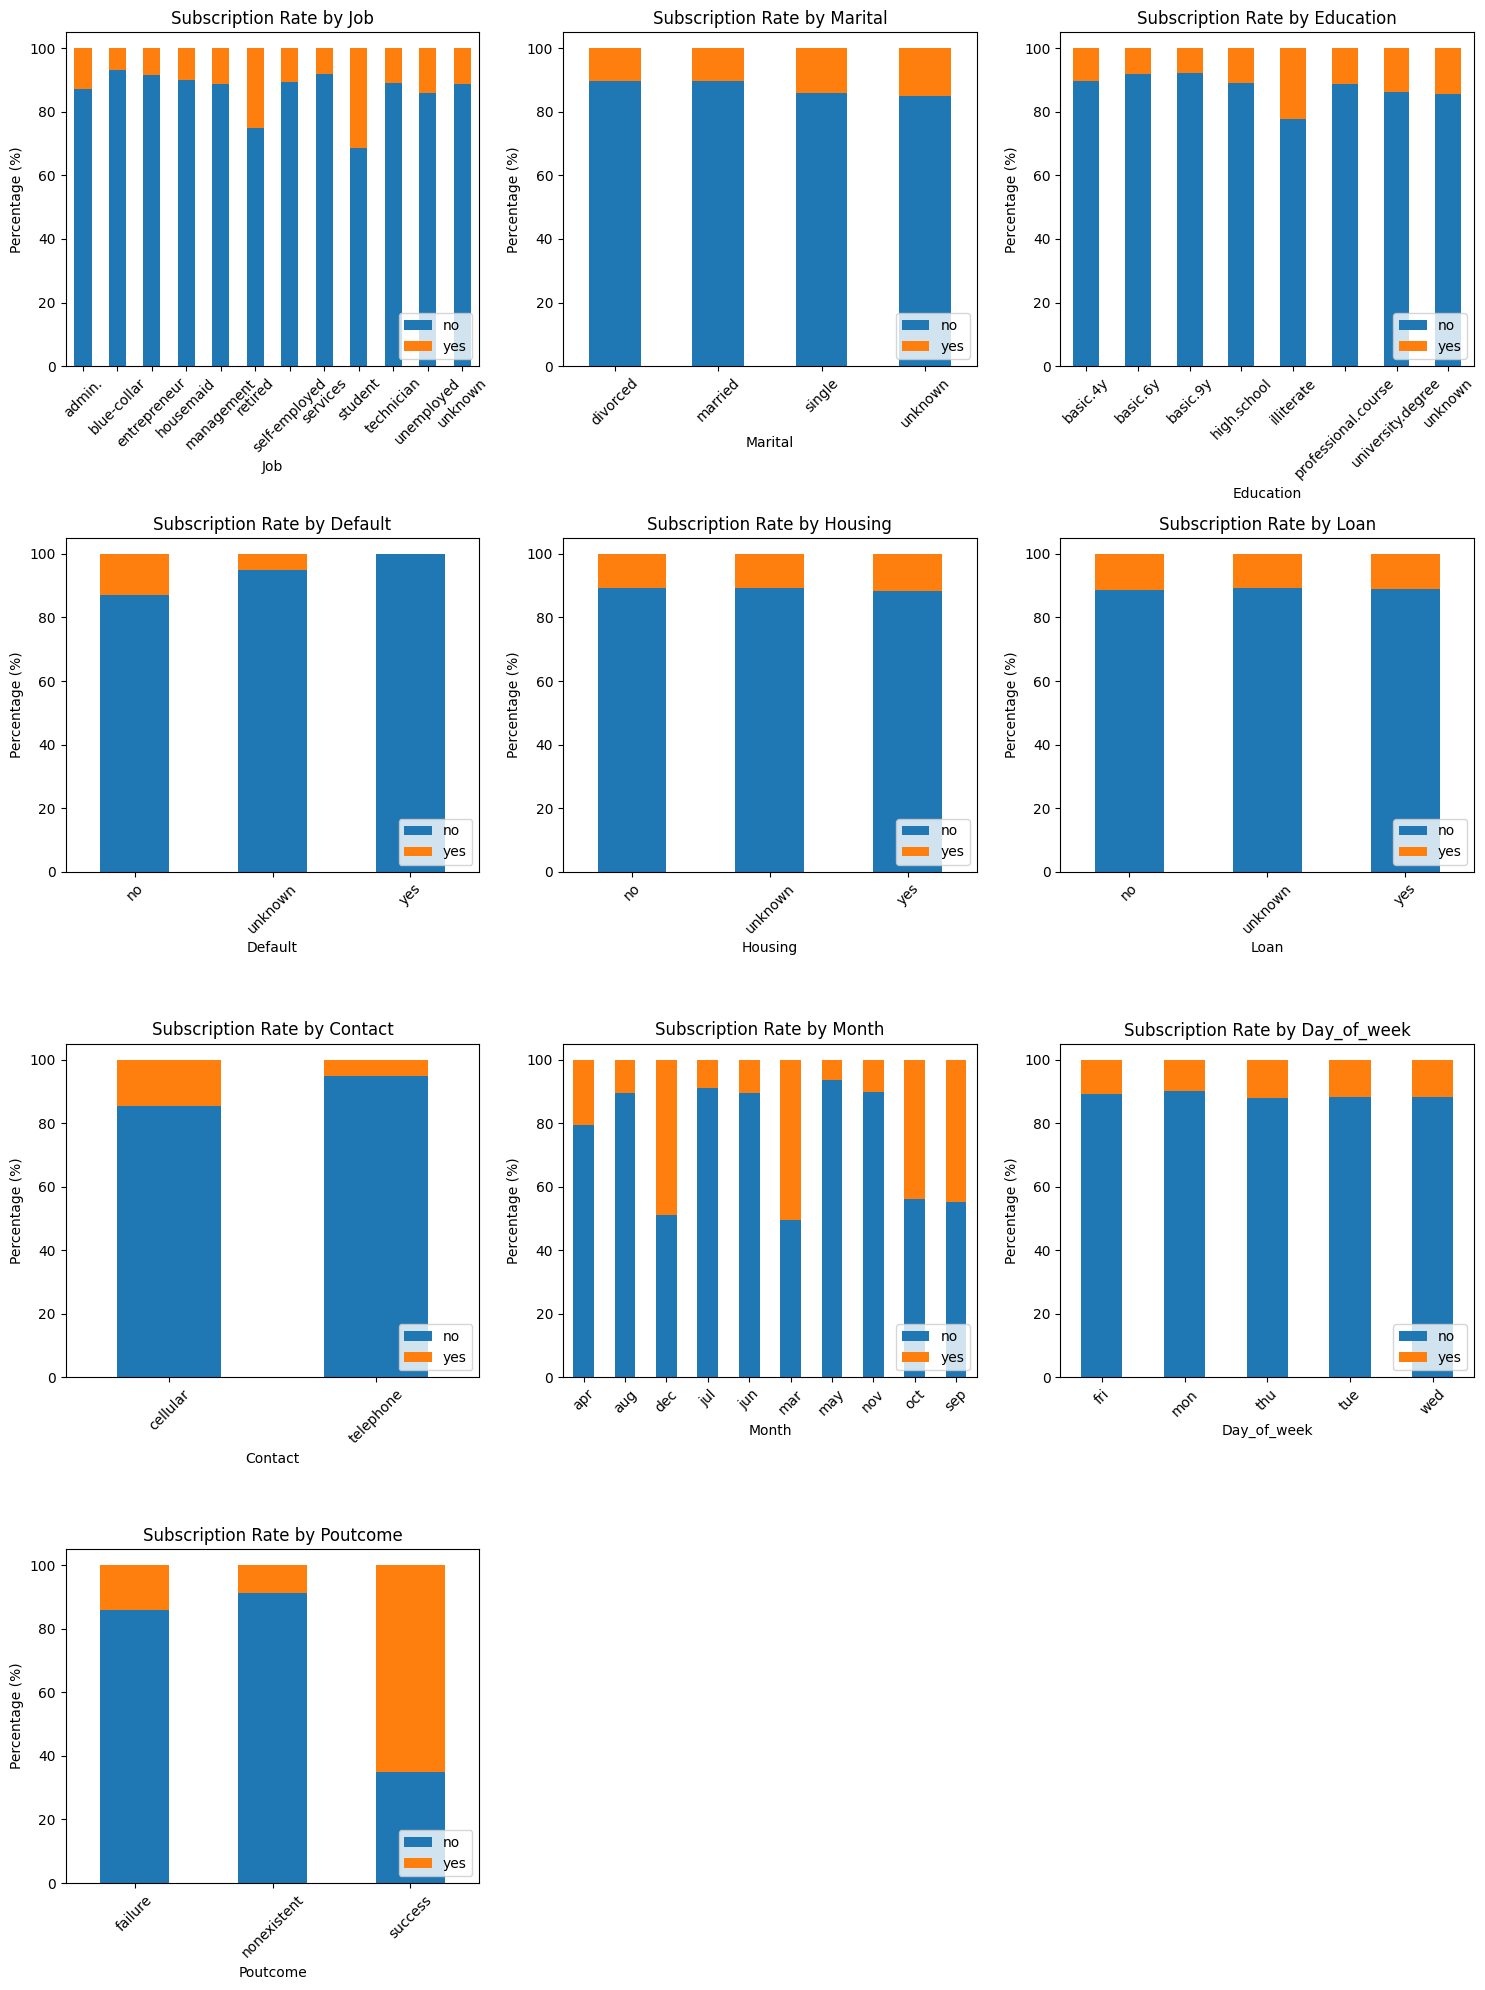

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

categorical_columns = bank_df.select_dtypes(include=['object']).columns.tolist()
# Remove the target variable 'y' from the list of categorical columns to plot
categorical_columns = [col for col in categorical_columns if col != 'y']

# Determine the number of rows and columns for the grid
n_cols = 3 # You can adjust the number of columns as needed
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Stacked bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    # Calculate the contingency table with percentages for the current column and 'y'
    contingency_table = pd.crosstab(bank_df[col], bank_df['y'], normalize='index') * 100

    # Create the stacked bar chart on the current subplot
    contingency_table.plot(kind='bar', stacked=True, ax=axes[i])

    axes[i].set_title(f'Subscription Rate by {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Percentage (%)')
    axes[i].tick_params(axis='x', rotation=45) # Removed ha='right'
    axes[i].legend(loc='lower right') # Add legend to each subplot, removed title


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Summary of Emergent Patterns in Categorical Data

- Job: Students and retired individuals show higher subscription rates.

- Education: Illiterate and university degree holders have relatively higher subscription rates.

- Contact Month: March, October, September, and December show significantly higher subscription rates.

- Previous Outcome: Previous success is a strong predictor of current subscription.

- Other Variables: Marital, default, housing, loan, and day_of_week show less varied subscription rates across categories.

## Checking for Missing (Unknown Data)

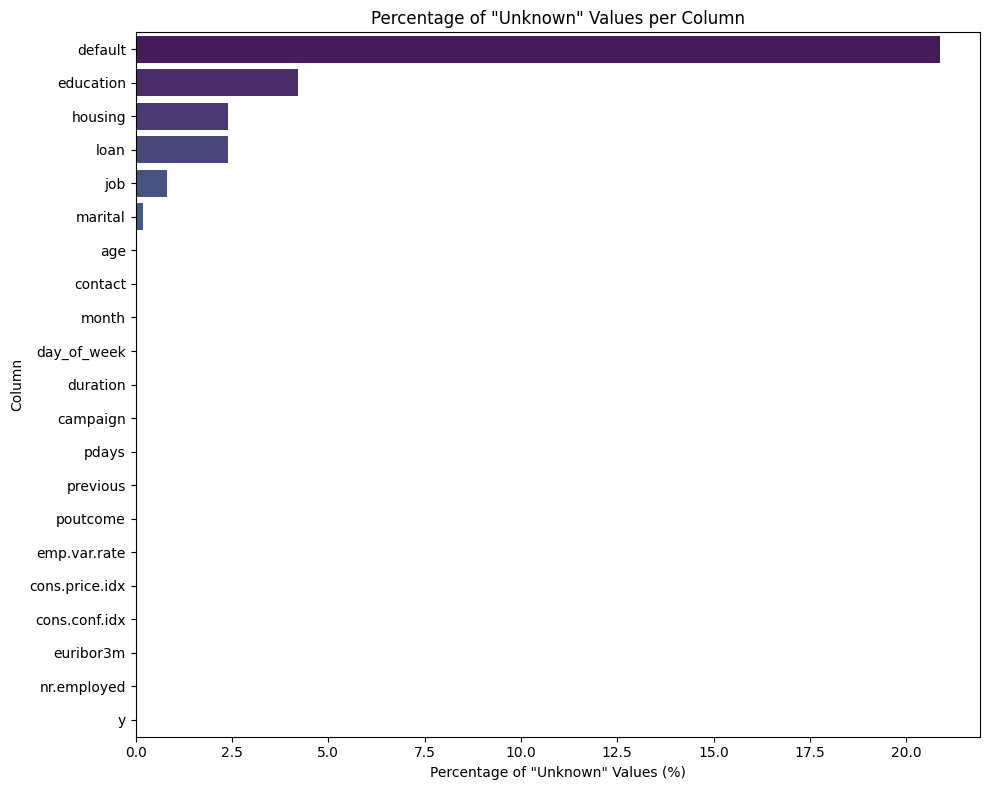

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of 'unknown' values for each column (include those with 0)
all_unknown_percentages = (bank_df == 'unknown').sum() / len(bank_df) * 100

# Sort the values for better visualization
sorted_unknown_percentages = all_unknown_percentages.sort_values(ascending=False)

# Create a horizontal bar chart of the unknown percentages
plt.figure(figsize=(10, 8)) # Adjusted figure size for horizontal plot
sns.barplot(x=sorted_unknown_percentages.values, y=sorted_unknown_percentages.index, hue=sorted_unknown_percentages.index, palette='viridis', legend=False) # Swapped x and y for horizontal
plt.title('Percentage of "Unknown" Values per Column')
plt.xlabel('Percentage of "Unknown" Values (%)')
plt.ylabel('Column')
# No rotation needed for y-axis labels in a horizontal plot
plt.tight_layout()
plt.show()

## Summary of Missing "Unknown' Data

- The 'default' column has the highest percentage of 'unknown' values (around 20.87%), indicating a significant portion of missing information for this feature.

- The 'education' column also has a notable percentage of 'unknowns' (around 4%).

- The 'housing' and 'loan' columns have a similar, smaller percentage of 'unknown' values (around 2.40% each).

- The 'job' and 'marital' columns have a very small percentage of 'unknown' values (less than 1% each).

- Many columns, including 'age', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', and all the environmental/economic indicators, have 0% 'unknown' values.